In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [7]:
# Read in the dataset
airbnb = pd.read_json("C:/Users/tpsna/Downloads/sample_airbnb.json")


In [ ]:
airbnb


In [20]:
airbnb_data = []
for i, row in airbnb.iterrows():
    data = dict(Id=row['_id'],
                Listing_url=row['listing_url'],
                Name=row['name'],
                Property_type=row['property_type'],
                Room_type=row['room_type'],
                Min_nights=int(row['minimum_nights']),
                Max_nights=int(row['maximum_nights']),
                Cancellation_policy=row['cancellation_policy'],
                Accommodates=row['accommodates'],
                Total_bedrooms=row.get('bedrooms'),
                Total_beds=row.get('beds'),
                Availability_365=row['availability']['availability_365'],
                Price=row['price'],
                Security_deposit=row.get('security_deposit'),
                Cleaning_fee=row.get('cleaning_fee'),
                Guests_included=row['guests_included'],
                No_of_reviews=row['number_of_reviews'],
                Review_scores=row['review_scores'].get('review_scores_rating'),
                Amenities=', '.join(row['amenities']),
                Host_id=row['host']['host_id'],
                Host_name=row['host']['host_name'],
                Country=row['address']['country'],
                Longitude=row['address']['location']['coordinates'][0],
                Latitude=row['address']['location']['coordinates'][1],
                Is_location_exact=row['address']['location']['is_location_exact']
                )
    airbnb_data.append(data)


In [21]:
df=pd.DataFrame(airbnb_data)

In [22]:
df.columns

Index(['Id', 'Listing_url', 'Name', 'Property_type', 'Room_type', 'Min_nights',
       'Max_nights', 'Cancellation_policy', 'Accommodates', 'Total_bedrooms',
       'Total_beds', 'Availability_365', 'Price', 'Security_deposit',
       'Cleaning_fee', 'Guests_included', 'No_of_reviews', 'Review_scores',
       'Amenities', 'Host_id', 'Host_name', 'Country', 'Longitude', 'Latitude',
       'Is_location_exact'],
      dtype='object')

In [24]:
# Handling missing values
df['Name'] = df['Name'].fillna('Unknown')
#df['House_rules'] = df['House_rules'].fillna('No house rules available')
df['Host_name'] = df['Host_name'].fillna('Unknown')
#df['Amenities'] =  df['Amenities'].fillna('Not available')


In [13]:
# Replace empty strings with "No house rules available"
#df['House_rules'] = df['House_rules'].replace('', 'No house rules available')
# Replace missing values with "No house rules available"
#df['House_rules'] = df['House_rules'].fillna('No house rules available')


In [26]:
df['Amenities']= df['Amenities'].replace('', 'Not available')
df['Amenities']= df['Amenities'].fillna('Not available')

In [27]:
# Assuming '0' for missing values in Price, Extra_people, and Guests_included
df['Price'] = df['Price'].fillna(0).astype(int)
df['Guests_included'] = df['Guests_included'].fillna(0).astype(int)

# Converting columns to float after handling missing values
df['Security_deposit'] = df['Security_deposit'].fillna(0).astype(int)
df['Cleaning_fee'] = df['Cleaning_fee'].fillna(0).astype(int)
df['Total_beds'] = df['Total_beds'].fillna(0).astype(int)
df['Total_bedrooms'] = df['Total_bedrooms'].fillna(0).astype(int)

# Imputing missing values for Total_beds and Total_bedrooms and Review_Scores with median
median_review_scores = df['Review_scores'].median()
df['Review_scores'] = df['Review_scores'].fillna(median_review_scores)




In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   5555 non-null   int64  
 1   Listing_url          5555 non-null   object 
 2   Name                 5555 non-null   object 
 3   Property_type        5555 non-null   object 
 4   Room_type            5555 non-null   object 
 5   Min_nights           5555 non-null   int64  
 6   Max_nights           5555 non-null   int64  
 7   Cancellation_policy  5555 non-null   object 
 8   Accommodates         5555 non-null   int64  
 9   Total_bedrooms       5555 non-null   int32  
 10  Total_beds           5555 non-null   int32  
 11  Availability_365     5555 non-null   int64  
 12  Price                5555 non-null   int32  
 13  Security_deposit     5555 non-null   int32  
 14  Cleaning_fee         5555 non-null   int32  
 15  Guests_included      5555 non-null   i

In [17]:
df

,Id,Listing_url,Name,Description,House_rules,Property_type,Room_type,Min_nights,Max_nights,Cancellation_policy,...,Guests_included,No_of_reviews,Review_scores,Amenities,Host_id,Host_name,Country,Longitude,Latitude,Is_location_exact
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,"Murphy bed, optional second bedroom available....",No smoking is permitted in the apartment. All ...,Apartment,Private room,12,360,strict_14_with_grace_period,...,1,70,94.0,"Internet, Wifi, Air conditioning, Kitchen, Ele...",454250,Greta,United States,-73.965230,40.799620,False
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,We are on the central city Blue mosque 5 minu...,No house rules available,Bed and breakfast,Private room,1,1125,moderate,...,1,29,92.0,"Internet, Wifi, Air conditioning, Free parking...",52004703,Mehmet Emin,Turkey,28.980090,41.006200,False
2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",No house rules available,Apartment,Entire home/apt,4,20,flexible,...,1,3,100.0,"Air conditioning, Kitchen, Smoking allowed, Do...",51624384,Giovanni,Hong Kong,114.150270,22.281580,True
3,10084023,https://www.airbnb.com/rooms/10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,"1. 禁止吸煙, 只限女生入住 (除得到批准) No smoking and only fe...",Guesthouse,Private room,1,500,strict_14_with_grace_period,...,1,81,92.0,"TV, Wifi, Air conditioning, Kitchen, Elevator,...",51744313,Yi,Hong Kong,114.166900,22.331400,True
4,10091713,https://www.airbnb.com/rooms/10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...","No smoking: No smoking any substance, includi...",Apartment,Entire home/apt,10,21,strict_14_with_grace_period,...,1,64,95.0,"TV, Wifi, Kitchen, Elevator, Heating, Washer, ...",13764143,Ben,Australia,151.215540,-33.880290,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,No house rules available,House,Entire home/apt,1,1125,flexible,...,1,0,95.0,"TV, Cable TV, Internet, Wifi, Kitchen, Buzzer/...",51303748,Eren,Turkey,29.030790,40.985630,False
5551,9993190,https://www.airbnb.com/rooms/9993190,Just Steps from the Ocean at Premier Platinum ...,Relax Hawaiian Style in Gated Community on Oce...,"As a guest of Coconut Condos, I agree to the f...",Townhouse,Entire home/apt,3,365,strict_14_with_grace_period,...,1,15,92.0,"TV, Wifi, Air conditioning, Pool, Kitchen, Fre...",51013381,Coconut Condos,United States,-156.667520,20.858940,False
5552,9887054,https://www.airbnb.com/rooms/9887054,Quarry Bay fully furnished studio C,Newly renovated studio flat with full furniture.,No house rules available,Apartment,Private room,3,1125,flexible,...,2,4,85.0,"TV, Wifi, Air conditioning, Kitchen, Elevator,...",31386255,Cat,Hong Kong,114.207220,22.291570,False
5553,9907907,https://www.airbnb.com/rooms/9907907,Large double room in Bondi,A bright large double room is available in a b...,We like to keep the flat clean and tidy so wou...,Apartment,Private room,3,1125,moderate,...,2,0,95.0,"TV, Internet, Wifi, Kitchen, Washer, Dryer, Sm...",47615848,Lucy,Australia,151.265420,-33.892980,False


In [29]:
df.isna().sum()

Id                     0
Listing_url            0
Name                   0
Property_type          0
Room_type              0
Min_nights             0
Max_nights             0
Cancellation_policy    0
Accommodates           0
Total_bedrooms         0
Total_beds             0
Availability_365       0
Price                  0
Security_deposit       0
Cleaning_fee           0
Guests_included        0
No_of_reviews          0
Review_scores          0
Amenities              0
Host_id                0
Host_name              0
Country                0
Longitude              0
Latitude               0
Is_location_exact      0
dtype: int64

In [30]:
df.to_csv('Airbnb_data.csv',index=False)

Exploratory Data Analysis:

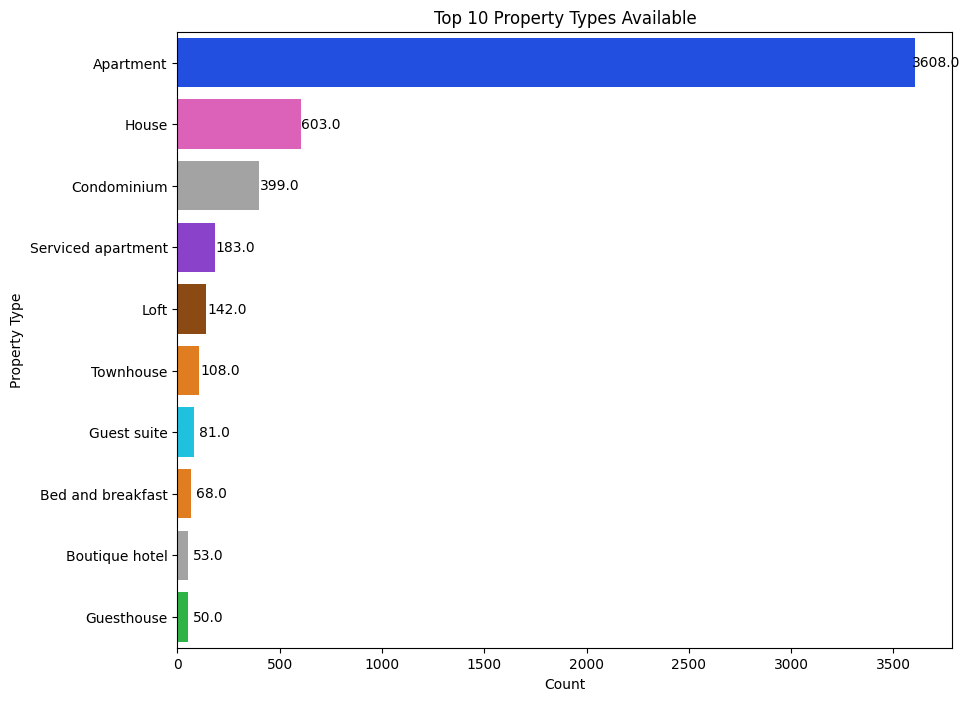

In [ ]:

plt.figure(figsize=(10, 8))
ax = sns.countplot(y=df['Property_type'], 
                    order=df['Property_type'].value_counts().head(10).index, 
                    hue=df['Property_type'], 
                    palette='bright', 
                    dodge=False, 
                    legend=False)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_width() + 100, p.get_y() + 0.4),
                ha='center', va='center', fontsize=10, color='black')

ax.set_title("Top 10 Property Types Available")
ax.set_xlabel("Count")
ax.set_ylabel("Property Type")

plt.show()


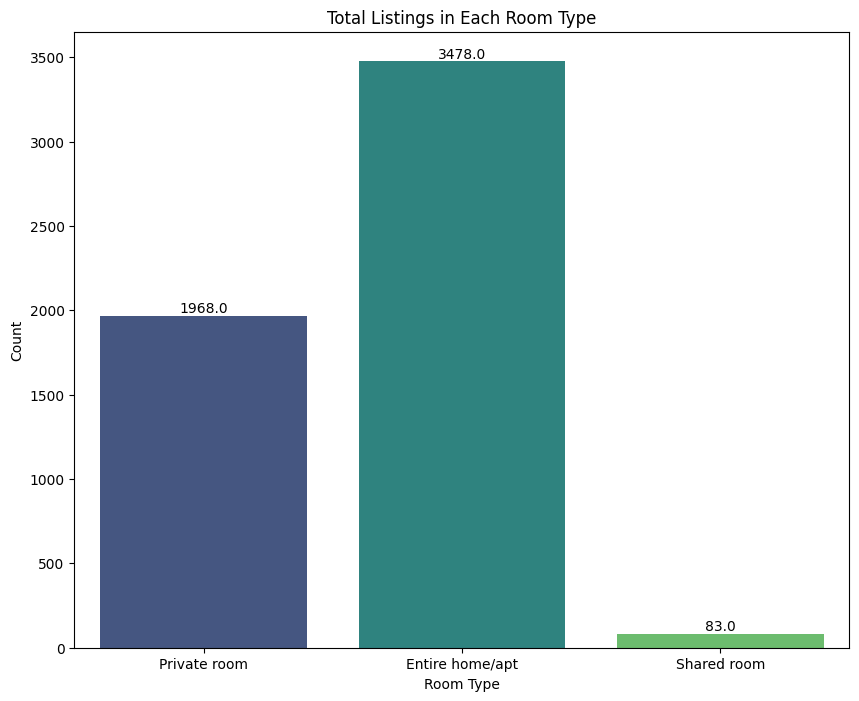

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, x='Room_type', hue='Room_type', dodge=False, palette='viridis', legend=False)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

ax.set_title("Total Listings in Each Room Type")
ax.set_xlabel("Room Type")
ax.set_ylabel("Count")

plt.show()


Text(0.5, 1.0, 'Top 10 Hosts with Highest number of Listings')

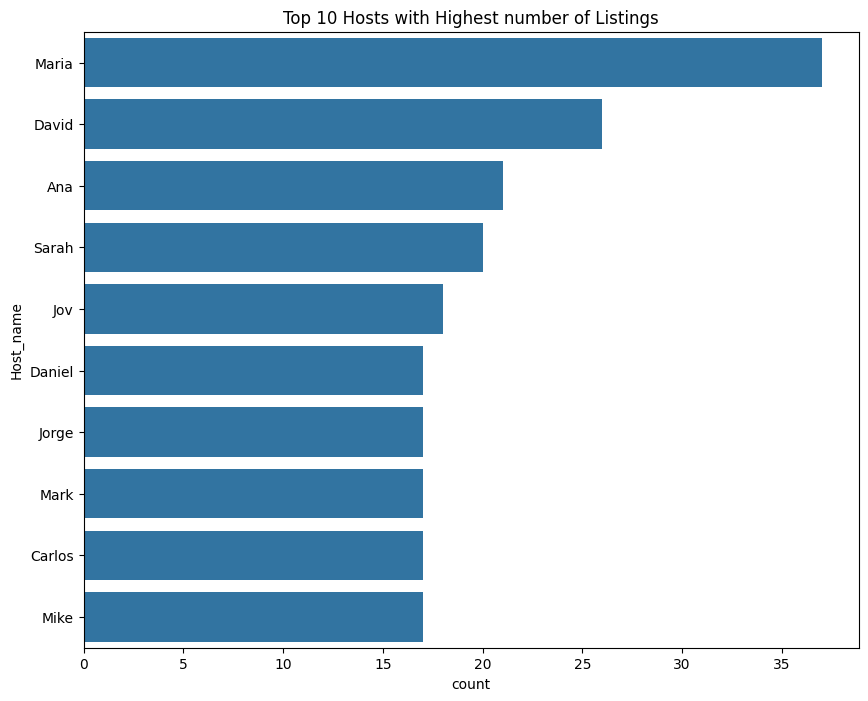

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df,y=df.Host_name,order=df.Host_name.value_counts().index[:10])
ax.set_title("Top 10 Hosts with Highest number of Listings")


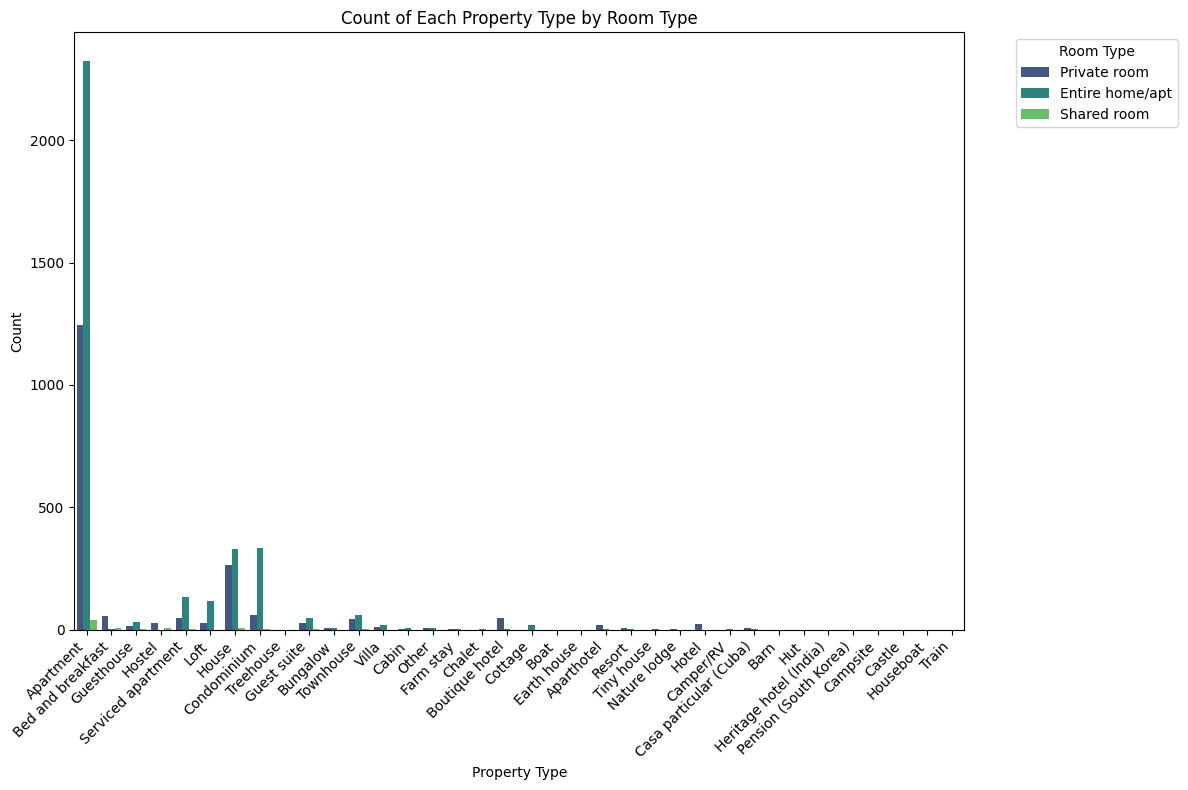

In [ ]:
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
sns.countplot(data=df, x='Property_type', hue='Room_type', palette='viridis')
plt.title('Count of Each Property Type by Room Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


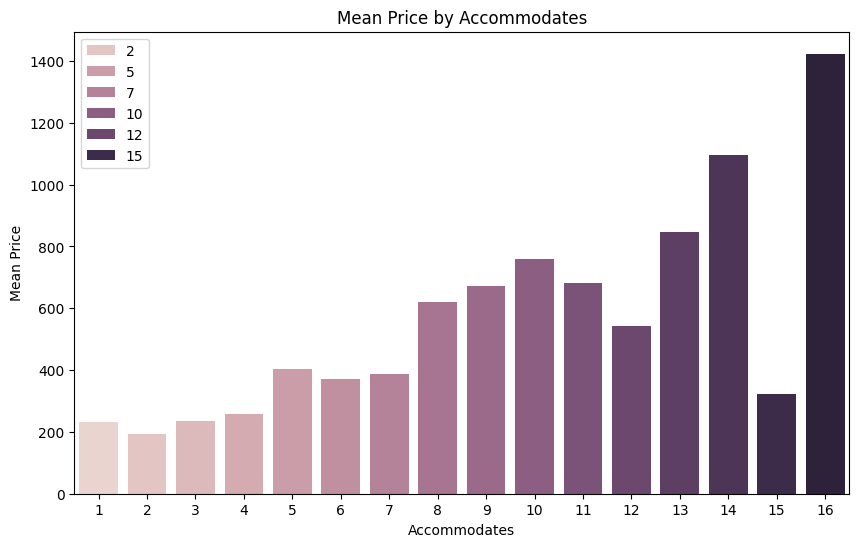

In [28]:
# Select the main two columns for correlation analysis
main_columns = ['Price', 'Accommodates']  # Replace with your main columns

# Extract the main columns from the DataFrame
main_df = df[main_columns]

# Group by 'Accommodates' and calculate the mean price for each group
mean_price_by_accommodates = main_df.groupby('Accommodates')['Price'].mean().reset_index()

# Bar chart showing the mean price for each value of 'Accommodates'
plt.figure(figsize=(10, 6))
sns.barplot(x='Accommodates', y='Price', data=mean_price_by_accommodates, hue='Accommodates', dodge=False)
plt.title('Mean Price by Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Mean Price')
plt.legend(title=None)
plt.show()


In [ ]:
# Group by 'Room_type' and calculate the mean price for each group
pr_df = df.groupby('Room_type', as_index=False)['Price'].mean()

# Sort values by mean price
pr_df = pr_df.sort_values(by='Price')

# Create a bar chart
fig = px.bar(pr_df, x='Room_type', y='Price', color='Price')
fig.update_layout(title='Mean Price by Room Type', xaxis_title='Room Type', yaxis_title='Mean Price')
fig.show()
